In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


In [2]:
dataset_dir = 'PySpark/ETL_result'
dir_contents = os.listdir(dataset_dir)
dir_contents.sort()
for f in dir_contents:
	print(f) if f.endswith('.csv') else None

part-00000-d0d2ffe4-bfc8-44a3-bc42-8c695473d09a-c000.csv
part-00001-d0d2ffe4-bfc8-44a3-bc42-8c695473d09a-c000.csv
part-00002-d0d2ffe4-bfc8-44a3-bc42-8c695473d09a-c000.csv
part-00003-d0d2ffe4-bfc8-44a3-bc42-8c695473d09a-c000.csv
part-00004-d0d2ffe4-bfc8-44a3-bc42-8c695473d09a-c000.csv
part-00005-d0d2ffe4-bfc8-44a3-bc42-8c695473d09a-c000.csv
part-00006-d0d2ffe4-bfc8-44a3-bc42-8c695473d09a-c000.csv
part-00007-d0d2ffe4-bfc8-44a3-bc42-8c695473d09a-c000.csv


In [3]:
twitter_col = ['account_id', 'followers_count', 'following_count', \
    'statuses_count', 'listed_count', 'active_date']
df = pd.DataFrame(columns = twitter_col)

for f in dir_contents:
    if f.endswith('.csv'):
        df1 = pd.read_csv(dataset_dir + '/' + f, names = twitter_col)
        df = pd.concat([df, df1])        

In [4]:
df

,account_id,followers_count,following_count,statuses_count,listed_count,active_date
0,5.863300e+04,4155.0,4395.0,12823,72,2470.0
1,6.045300e+04,438.0,757.0,515,9,2448.0
2,7.237300e+04,4295.0,4728.0,16282,166,2469.0
3,6.587230e+05,559.0,15.0,5991,25,2443.0
4,7.908860e+05,877.0,415.0,11320,42,2408.0
...,...,...,...,...,...,...
8083,1.716944e+09,4.0,84.0,51,0,22.0
8084,1.716982e+09,0.0,14.0,2,0,16.0
8085,1.717004e+09,7.0,23.0,29,0,27.0
8086,1.717025e+09,2.0,24.0,10,0,15.0


In [5]:
df.isnull().sum()

account_id         50
followers_count     3
following_count     4
statuses_count      2
listed_count        1
active_date        81
dtype: int64

In [6]:
df.dropna(subset = ['account_id'], inplace=True)
df.isnull().sum()

account_id          0
followers_count     0
following_count     0
statuses_count      0
listed_count        0
active_date        47
dtype: int64

In [7]:
df['active_date'].fillna(df['active_date'].mean(), inplace=True)
df.isnull().sum()

account_id         0
followers_count    0
following_count    0
statuses_count     0
listed_count       0
active_date        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134978 entries, 0 to 8087
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   account_id       134978 non-null  float64
 1   followers_count  134978 non-null  float64
 2   following_count  134978 non-null  float64
 3   statuses_count   134978 non-null  object 
 4   listed_count     134978 non-null  object 
 5   active_date      134978 non-null  float64
dtypes: float64(4), object(2)
memory usage: 7.2+ MB


In [9]:
train = df.iloc[:,1:]
train

,followers_count,following_count,statuses_count,listed_count,active_date
0,4155.0,4395.0,12823,72,2470.0
1,438.0,757.0,515,9,2448.0
2,4295.0,4728.0,16282,166,2469.0
3,559.0,15.0,5991,25,2443.0
4,877.0,415.0,11320,42,2408.0
...,...,...,...,...,...
8083,4.0,84.0,51,0,22.0
8084,0.0,14.0,2,0,16.0
8085,7.0,23.0,29,0,27.0
8086,2.0,24.0,10,0,15.0


In [10]:
norm_df = MinMaxScaler().fit_transform(train)
norm_df = pd.DataFrame(norm_df, columns = list(train.columns))
norm_df

,followers_count,following_count,statuses_count,listed_count,active_date
0,0.002965,0.014794,0.053798,1.849950e-16,1.000000
1,0.000313,0.002548,0.002161,2.312437e-17,0.991093
2,0.003065,0.015915,0.068310,4.265162e-16,0.999595
3,0.000399,0.000050,0.025135,6.423436e-17,0.989069
4,0.000626,0.001397,0.047492,1.079137e-16,0.974899
...,...,...,...,...,...
134973,0.000003,0.000283,0.000214,0.000000e+00,0.008907
134974,0.000000,0.000047,0.000008,0.000000e+00,0.006478
134975,0.000005,0.000077,0.000122,0.000000e+00,0.010931
134976,0.000001,0.000081,0.000042,0.000000e+00,0.006073


In [11]:
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134978 entries, 0 to 134977
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   followers_count  134978 non-null  float64
 1   following_count  134978 non-null  float64
 2   statuses_count   134978 non-null  float64
 3   listed_count     134978 non-null  float64
 4   active_date      134978 non-null  float64
dtypes: float64(5)
memory usage: 5.1 MB


In [12]:
# fitting multiple k-means algorithms
# insertia
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(norm_df)
    SSE.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

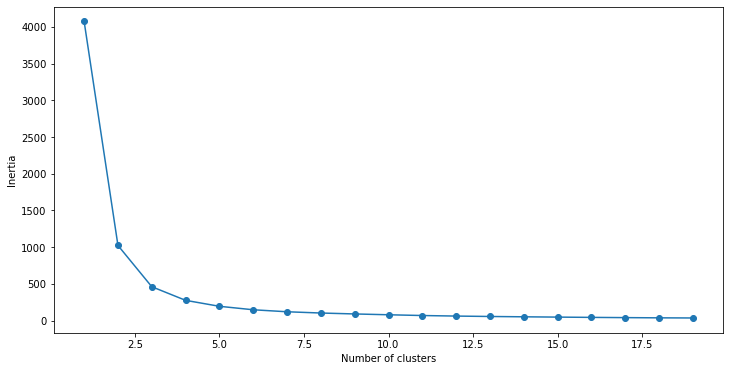

In [13]:
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [14]:
k = 5
kmeans = KMeans(n_clusters = k, init='k-means++')
kmeans.fit(norm_df)
pred = kmeans.predict(norm_df)
kmeans.inertia_

195.14321547639585

In [15]:
frame = norm_df.copy()
frame['cluster'] = pred
frame['cluster'].value_counts()

1    74063
3    23826
2    17753
4    12002
0     7334
Name: cluster, dtype: int64

In [16]:
frame

,followers_count,following_count,statuses_count,listed_count,active_date,cluster
0,0.002965,0.014794,0.053798,1.849950e-16,1.000000,0
1,0.000313,0.002548,0.002161,2.312437e-17,0.991093,0
2,0.003065,0.015915,0.068310,4.265162e-16,0.999595,0
3,0.000399,0.000050,0.025135,6.423436e-17,0.989069,0
4,0.000626,0.001397,0.047492,1.079137e-16,0.974899,0
...,...,...,...,...,...,...
134973,0.000003,0.000283,0.000214,0.000000e+00,0.008907,1
134974,0.000000,0.000047,0.000008,0.000000e+00,0.006478,1
134975,0.000005,0.000077,0.000122,0.000000e+00,0.010931,1
134976,0.000001,0.000081,0.000042,0.000000e+00,0.006073,1


In [17]:
frame.loc[frame['cluster']==0]

,followers_count,following_count,statuses_count,listed_count,active_date,cluster
0,0.002965,0.014794,0.053798,1.849950e-16,1.000000,0
1,0.000313,0.002548,0.002161,2.312437e-17,0.991093,0
2,0.003065,0.015915,0.068310,4.265162e-16,0.999595,0
3,0.000399,0.000050,0.025135,6.423436e-17,0.989069,0
4,0.000626,0.001397,0.047492,1.079137e-16,0.974899,0
...,...,...,...,...,...,...
21367,0.000049,0.000135,0.003407,0.000000e+00,0.506073,0
21378,0.000496,0.001208,0.122959,2.569374e-18,0.504453,0
21467,0.000003,0.000101,0.000046,0.000000e+00,0.506073,0
21831,0.000186,0.001151,0.073189,2.569374e-18,0.504453,0
